<a href="https://colab.research.google.com/github/CharlitonNogueira/capitulo-1/blob/main/prova_questao_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [84]:
#CARREGAR ARQUIVO CSV COM A BASE DE DADOS
df = pd.read_csv('/content/acoesvale.csv')
df.head()

,data,abertura,maximo,minimo,fechamento,acoes,volume
0,2022-12-19,15.930000,16.129999,15.850000,16.100000,14.814281,20805200
1,2022-12-20,16.440001,16.690001,16.389999,16.440001,15.127129,16416900
2,2022-12-21,16.510000,16.740000,16.430000,16.590000,15.265149,27809300
3,2022-12-22,16.530001,16.610001,16.299999,16.540001,15.219142,17452500
4,2022-12-23,16.510000,16.790001,16.500000,16.690001,15.357162,13416000


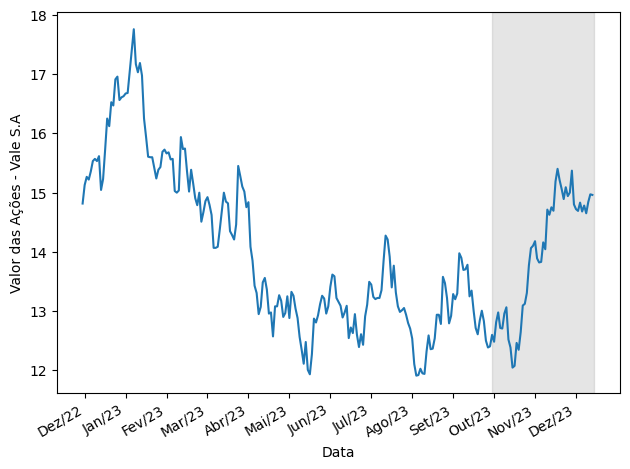

In [85]:
#PLOTANDO O GRAFICO E A FIGURA NO PYTHON
fig, ax = plt.subplots()

ax.plot(df['data'], df['acoes'])
ax.set_xlabel('Data')
ax.set_ylabel('Valor das Ações - Vale S.A')
ax.axvspan(250, 200, color='#808080', alpha=0.2)


plt.xticks(np.arange(1, 261, 20), ['Dez/22', 'Jan/23', 'Fev/23', 'Mar/23', 'Abr/23', 'Mai/23', 'Jun/23', 'Jul/23', 'Ago/23', 'Set/23', 'Out/23', 'Nov/23', 'Dez/23'])

fig.autofmt_xdate()
plt.tight_layout()

In [86]:
#ATRIBUINDO VALORES A CONJUNTOS DE DADOS CRIADOS COM NOME DE DADO E TESTE A PARTIR DA LISTA
#DE DADOS DAS ACOES DA VALE ONDE TREINO É COMPOSTO PELOS DADOS QUE VÃO ATE A LINHA 200 E O
#CONJUNTO TESTE DE 200 ATE O ÚLTIMO VALOR DA LISTA
treino = df[:-50]
teste = df[-50:]

In [87]:
#TIRANDO A MEDIA DOS VALORES DO CONJUNTO TREINO
media_historica = np.mean(treino['acoes'])
media_historica

14.026019214999998

In [88]:
#CRIANDO UMA NOVA COLUNA COM O VALOR DA MEDIA DO CONJUNTO TREINO
teste.loc[:, 'media_previsao'] = media_historica

teste

,data,abertura,maximo,minimo,fechamento,acoes,volume,media_previsao
200,2023-10-06,12.71,13.07,12.69,12.98,12.596406,19671500,14.026019
201,2023-10-09,12.79,12.91,12.65,12.86,12.479953,13502900,14.026019
202,2023-10-10,13.13,13.24,13.09,13.20,12.809905,13860100,14.026019
203,2023-10-11,13.27,13.39,13.18,13.37,12.974881,15536000,14.026019
204,2023-10-12,13.40,13.44,13.01,13.10,12.712861,17744400,14.026019
205,2023-10-13,13.20,13.33,13.04,13.09,12.703156,14987200,14.026019
206,2023-10-16,13.29,13.40,13.23,13.35,12.955473,12852800,14.026019
207,2023-10-17,13.15,13.54,13.14,13.46,13.062222,19042200,14.026019
208,2023-10-18,13.27,13.28,12.89,12.90,12.518770,26635600,14.026019
209,2023-10-19,12.86,12.95,12.74,12.76,12.382909,27015700,14.026019


In [89]:
#CALCULO MATEMATICO PARA ENCONTRAR A MÉDIA ARITMETICA DA MEDIA REAL E DA MEDIA PREVISTA
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [90]:
#FUNCAO PARA CALCULAR O MAPE QUE UTILIZA COMO PARAMETRO OS DADOS DO CONJUNTO TESTE E A MEDIA PREVISTA
mape_media_historica = mape(teste['acoes'], teste['media_previsao'])
mape_media_historica

6.726191827653998

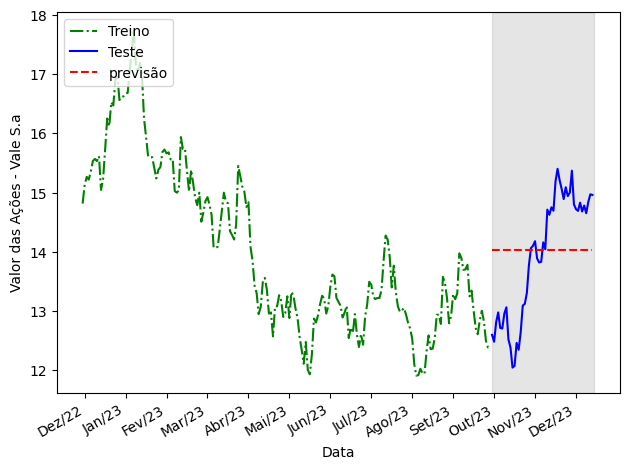

In [91]:
#PLOTANDO A FIGURA E O GRAFICO COM OS DADOS OBTIDOS
fig, ax = plt.subplots()

ax.plot(treino['data'], treino['acoes'], 'g-.', label='Treino')
ax.plot(teste['data'], teste['acoes'], 'b-', label='Teste')
ax.plot(teste['data'], teste['media_previsao'], 'r--', label='previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor das Ações - Vale S.a')
ax.axvspan(250, 200, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(1, 261, 20), ['Dez/22', 'Jan/23', 'Fev/23', 'Mar/23', 'Abr/23', 'Mai/23', 'Jun/23', 'Jul/23', 'Ago/23', 'Set/23', 'Out/23', 'Nov/23', 'Dez/23'])

fig.autofmt_xdate()
plt.tight_layout()


In [92]:
#TECNICA INGÊNUA DE PREVISAO QUE UTILIZA APENAS OS DADOS DO ÚLTIMO ANO
media_ultimo_ano = np.mean(treino['acoes'][-50:])
media_ultimo_ano

12.915842540000002

In [93]:
#CRIA UMA NOVA COLUNA COM OS DADOS DA MEDIA DO ULTIMO ANO
teste.loc[:, 'previsao_media_2022'] = media_ultimo_ano

teste

,data,abertura,maximo,minimo,fechamento,acoes,volume,media_previsao,previsao_media_2022
200,2023-10-06,12.71,13.07,12.69,12.98,12.596406,19671500,14.026019,12.915843
201,2023-10-09,12.79,12.91,12.65,12.86,12.479953,13502900,14.026019,12.915843
202,2023-10-10,13.13,13.24,13.09,13.20,12.809905,13860100,14.026019,12.915843
203,2023-10-11,13.27,13.39,13.18,13.37,12.974881,15536000,14.026019,12.915843
204,2023-10-12,13.40,13.44,13.01,13.10,12.712861,17744400,14.026019,12.915843
205,2023-10-13,13.20,13.33,13.04,13.09,12.703156,14987200,14.026019,12.915843
206,2023-10-16,13.29,13.40,13.23,13.35,12.955473,12852800,14.026019,12.915843
207,2023-10-17,13.15,13.54,13.14,13.46,13.062222,19042200,14.026019,12.915843
208,2023-10-18,13.27,13.28,12.89,12.90,12.518770,26635600,14.026019,12.915843
209,2023-10-19,12.86,12.95,12.74,12.76,12.382909,27015700,14.026019,12.915843


In [94]:
#FUNCAO PARA CALCULAR O MAPE QUE UTILIZA COMO PARAMETRO OS DADOS DO CONJUNTO TESTE E A MEDIA PREVISTA DO ULTIMO ANO
mape_media_ultimo_ano = mape(teste['acoes'], teste['previsao_media_2022'])
mape_media_ultimo_ano

8.505449777577535

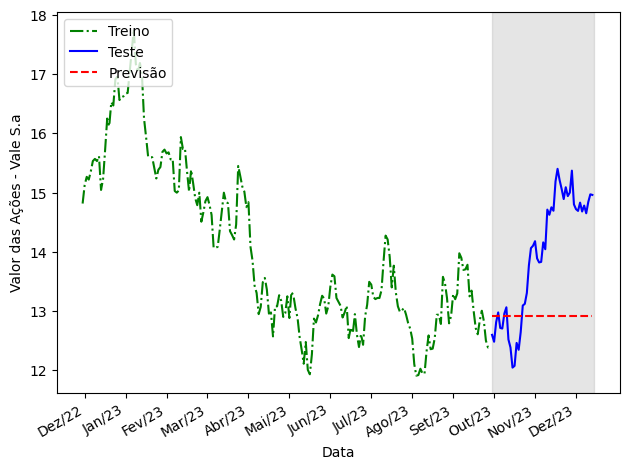

In [95]:
#PLOTANDO A FIGURA E O GRAFICO COM OS DADOS OBTIDOS
fig, ax = plt.subplots()

ax.plot(treino['data'], treino['acoes'], 'g-.', label='Treino')
ax.plot(teste['data'], teste['acoes'], 'b-', label='Teste')
ax.plot(teste['data'], teste['previsao_media_2022'], 'r--', label='Previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor das Ações - Vale S.a')
ax.axvspan(250, 200, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(1, 261, 20), ['Dez/22', 'Jan/23', 'Fev/23', 'Mar/23', 'Abr/23', 'Mai/23', 'Jun/23', 'Jul/23', 'Ago/23', 'Set/23', 'Out/23', 'Nov/23', 'Dez/23'])

fig.autofmt_xdate()
plt.tight_layout()

In [96]:
#TECNICA INGÊNUA DE PREVISAO UTILIZANDO APENAS O ÚLTIMO VALOR DO CONJUNTO TREINO
last = treino['acoes'].iloc[-1]
last

12.402317

In [97]:
#CRIAR COLUNA COM OS DADOS DO CONJUNTO TREINO
teste.loc[:, 'ultima_previsao'] = last

teste

,data,abertura,maximo,minimo,fechamento,acoes,volume,media_previsao,previsao_media_2022,ultima_previsao
200,2023-10-06,12.71,13.07,12.69,12.98,12.596406,19671500,14.026019,12.915843,12.402317
201,2023-10-09,12.79,12.91,12.65,12.86,12.479953,13502900,14.026019,12.915843,12.402317
202,2023-10-10,13.13,13.24,13.09,13.20,12.809905,13860100,14.026019,12.915843,12.402317
203,2023-10-11,13.27,13.39,13.18,13.37,12.974881,15536000,14.026019,12.915843,12.402317
204,2023-10-12,13.40,13.44,13.01,13.10,12.712861,17744400,14.026019,12.915843,12.402317
205,2023-10-13,13.20,13.33,13.04,13.09,12.703156,14987200,14.026019,12.915843,12.402317
206,2023-10-16,13.29,13.40,13.23,13.35,12.955473,12852800,14.026019,12.915843,12.402317
207,2023-10-17,13.15,13.54,13.14,13.46,13.062222,19042200,14.026019,12.915843,12.402317
208,2023-10-18,13.27,13.28,12.89,12.90,12.518770,26635600,14.026019,12.915843,12.402317
209,2023-10-19,12.86,12.95,12.74,12.76,12.382909,27015700,14.026019,12.915843,12.402317


In [98]:
#FUNCAO PARA CALCULAR O MAPE QUE UTILIZA COMO PARAMETRO OS DADOS DO CONJUNTO TESTE E A MEDIA PREVISTA
mape_ultima = mape(teste['acoes'], teste['ultima_previsao'])
mape_ultima

10.773640422980023

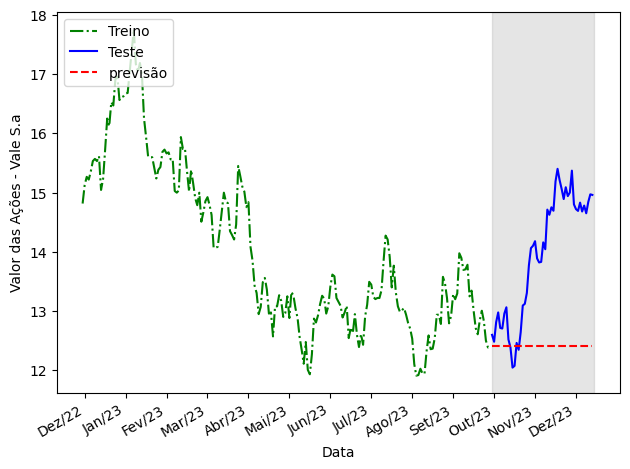

In [99]:
#PLOTANDO FIGURA E GRAFICO
fig, ax = plt.subplots()

ax.plot(treino['data'], treino['acoes'], 'g-.', label='Treino')
ax.plot(teste['data'], teste['acoes'], 'b-', label='Teste')
ax.plot(teste['data'], teste['ultima_previsao'], 'r--', label='previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor das Ações - Vale S.a')
ax.axvspan(250, 200, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(1, 261, 20), ['Dez/22', 'Jan/23', 'Fev/23', 'Mar/23', 'Abr/23', 'Mai/23', 'Jun/23', 'Jul/23', 'Ago/23', 'Set/23', 'Out/23', 'Nov/23', 'Dez/23'])

fig.autofmt_xdate()
plt.tight_layout()

In [100]:
#CRIANDO COLUNA  COM O INDICE PREVISAO SAZONAL PARA UMA ANALISE INGÊNUA SAZONAL
teste.loc[:, 'previsao_sazonal'] = treino['acoes'][-50:].values

teste

,data,abertura,maximo,minimo,fechamento,acoes,volume,media_previsao,previsao_media_2022,ultima_previsao,previsao_sazonal
200,2023-10-06,12.71,13.07,12.69,12.98,12.596406,19671500,14.026019,12.915843,12.402317,13.915432
201,2023-10-09,12.79,12.91,12.65,12.86,12.479953,13502900,14.026019,12.915843,12.402317,13.397955
202,2023-10-10,13.13,13.24,13.09,13.20,12.809905,13860100,14.026019,12.915843,12.402317,13.764894
203,2023-10-11,13.27,13.39,13.18,13.37,12.974881,15536000,14.026019,12.915843,12.402317,13.313276
204,2023-10-12,13.40,13.44,13.01,13.10,12.712861,17744400,14.026019,12.915843,12.402317,13.078059
205,2023-10-13,13.20,13.33,13.04,13.09,12.703156,14987200,14.026019,12.915843,12.402317,12.983974
206,2023-10-16,13.29,13.40,13.23,13.35,12.955473,12852800,14.026019,12.915843,12.402317,13.012199
207,2023-10-17,13.15,13.54,13.14,13.46,13.062222,19042200,14.026019,12.915843,12.402317,13.049834
208,2023-10-18,13.27,13.28,12.89,12.90,12.518770,26635600,14.026019,12.915843,12.402317,12.936931
209,2023-10-19,12.86,12.95,12.74,12.76,12.382909,27015700,14.026019,12.915843,12.402317,12.795800


In [101]:
##FUNCAO PARA CALCULAR O MAPE QUE UTILIZA COMO PARAMETRO OS DADOS DO CONJUNTO TESTE E A MEDIA PREVISTA
mape_previsao_sazonal = mape(teste['acoes'], teste['previsao_sazonal'])
mape_previsao_sazonal

8.883852758613154

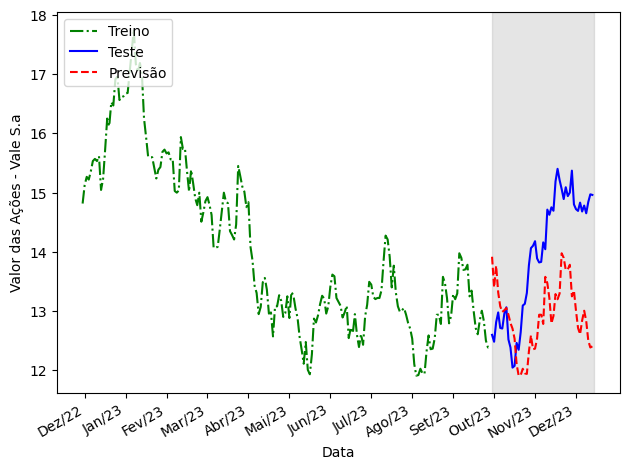

In [102]:
#PLOTANDO FIGURA E GRAFICO COM OS DADOS OBTIDOS
fig, ax = plt.subplots()

ax.plot(treino['data'], treino['acoes'], 'g-.', label='Treino')
ax.plot(teste['data'], teste['acoes'], 'b-', label='Teste')
ax.plot(teste['data'], teste['previsao_sazonal'], 'r--', label='Previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor das Ações - Vale S.a')
ax.axvspan(250, 200, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(1, 261, 20), ['Dez/22', 'Jan/23', 'Fev/23', 'Mar/23', 'Abr/23', 'Mai/23', 'Jun/23', 'Jul/23', 'Ago/23', 'Set/23', 'Out/23', 'Nov/23', 'Dez/23'])

fig.autofmt_xdate()
plt.tight_layout()

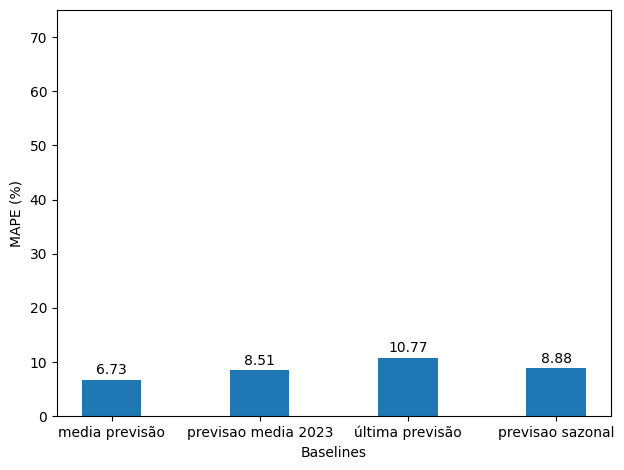

In [103]:
#PLOTANDO TODOS OS GRAFICOS COM OS VALORES OBTIDOS ATRAVEZ DAS TECNICAS INGÊNUAS UTILIZADAS
fig, ax = plt.subplots()

x = ['media previsão', 'previsao media 2023', 'última previsão', 'previsao sazonal']
y = [6.73, 8.51, 10.77, 8.88]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

A partir das técnicas utilizadas, o menor resultado obtido é o da média prevista, primeira técnica útilizada no trabalho, onde todos os anos do conjunto testes foram utilizados.
Primeiramente, foi atribuido a dois conjuntos nomeados como teste e treino, valores que compõem a lista de dados das ações da Vale onde separa os dados ao longo do tempo para que seja possível realizar a comparação dos dados atravéz das médias obtidas por meio dos resultados dessas comparações.
Primeiro foi utilizada a media da previsão que é composto por todos os anos do conjunto treino e o resultado obtido foi 6.73. O segundo resultado obtido foi de 8.51 que surgiu a partir da técnica de previsão ingênua do último ano do conjunto treino, ou seja, o ano de 2022. A terceira previsão foi retirada comparando apenas o último dados do conjunto treino em comparação com o conjunto teste para tentar prever o futuro esperado e o resultado gerado foi de 10.77, consequentemente, a última análise foi a sazonal que  apresentou o resultado de 8.88. Por tanto, segundo a literatura, o melhor resultado obtido é o que apresenta o menor valor, neste caso, a media previsão que gerou o valor de 6.73, conforme mostra no último gráfico do arquivo prova_primeira_questao.

PASSEIO ALEATORIO

In [104]:
#importar bibliotecas
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

OS PREÇOS DIARIOS DA VALE É UM PASSEIO ALEATORIO?

In [105]:
#gera o valor de ADF e do valor-p para confirmar se é estacionaria
vale_ADF_result = adfuller(df['acoes'])

print(f'ADF Statistic: {vale_ADF_result[0]}')
print(f'p-value: {vale_ADF_result[1]}')

ADF Statistic: -1.6543019305893856
p-value: 0.45479781719847934


In [106]:
#Transformando a serie não estacionaria em estacionária
diff_acoes = np.diff(df['acoes'], n=1)

In [107]:
#gera o valor de ADF e do valor-p para confirmar se é estacionaria
vale_diff_ADF_result = adfuller(diff_acoes)

print(f'ADF Statistic: {vale_diff_ADF_result[0]}')
print(f'p-value: {vale_diff_ADF_result[1]}')

ADF Statistic: -14.816759423955148
p-value: 1.9917632720638226e-27


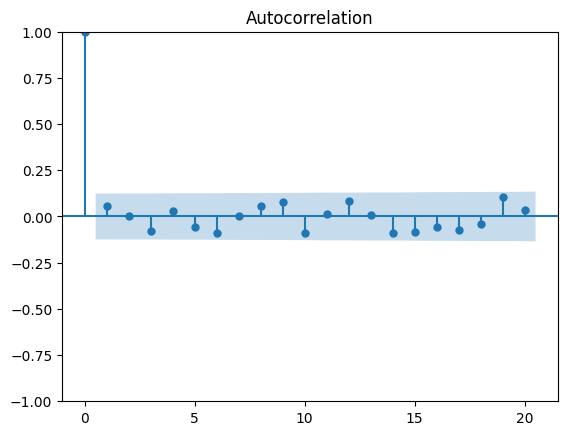

In [108]:
#plotando resultado obtido depois da transformação
plot_acf(diff_acoes, lags=20);

1.2 - Conforme o gráfico gerado atravéz dos dados das ações da Vale, a série é um passeio aleatório.
A serie em questão não é estacionária e a partir da transformação em estacionária, o resultado obtido para ADF foi de -14.81 e o valor-p de 1.9917632720638226e-27. Por tanto, conclui-se que a serie é um passeio aleatorio, pois o valor-p é menor do que 0.05 e a ADF é negativa.